# Prosper Loan Data Set Exploration
## by Patrick Maloney

## Preliminary Wrangling

I will be investigating the ProsperLoans dataset on loans given out on the platform. It is an extensive dataset with over 110K loans and 81 variables.  I will be doing some wrangling to only focus on about 10 variables of interest.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# Load in dataset
df = pd.read_csv('prosperLoanData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
df = df[['ListingKey', 'Term', 'LoanOriginalAmount', 'LoanStatus', 'BorrowerRate', 'EstimatedReturn', 'ProsperScore', 'ListingCategory (numeric)', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Investors']]
print(df.head())
print(df.info())

                ListingKey  Term  LoanOriginalAmount LoanStatus  BorrowerRate  \
0  1021339766868145413AB3B    36                9425  Completed        0.1580   
1  10273602499503308B223C1    36               10000    Current        0.0920   
2  0EE9337825851032864889A    36                3001  Completed        0.2750   
3  0EF5356002482715299901A    36               10000    Current        0.0974   
4  0F023589499656230C5E3E2    36               15000    Current        0.2085   

   EstimatedReturn  ProsperScore  ListingCategory (numeric)  \
0              NaN           NaN                          0   
1          0.05470           7.0                          2   
2              NaN           NaN                          0   
3          0.06000           9.0                         16   
4          0.09066           4.0                          2   

   DebtToIncomeRatio  StatedMonthlyIncome  MonthlyLoanPayment  Investors  
0               0.17          3083.333333              330.

In [5]:
# drop all rows without values in the selected columns of interest
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77557 entries, 1 to 113936
Data columns (total 12 columns):
ListingKey                   77557 non-null object
Term                         77557 non-null int64
LoanOriginalAmount           77557 non-null int64
LoanStatus                   77557 non-null object
BorrowerRate                 77557 non-null float64
EstimatedReturn              77557 non-null float64
ProsperScore                 77557 non-null float64
ListingCategory (numeric)    77557 non-null int64
DebtToIncomeRatio            77557 non-null float64
StatedMonthlyIncome          77557 non-null float64
MonthlyLoanPayment           77557 non-null float64
Investors                    77557 non-null int64
dtypes: float64(6), int64(4), object(2)
memory usage: 7.7+ MB


In [6]:
# fix datatypes for categorical variables
df.LoanStatus = df.LoanStatus.astype('category')
# convert Listing category to category and replace numbers with decriptions, then rename column Reason, drop listing category column
df['Reason'] = df['ListingCategory (numeric)'].astype('category')
df.Reason.cat.rename_categories(['N/A','Debt', 'HomeImprovement', 'Business', 'Student', 'Auto', 'Other', 'Baby', 'Boat', 'CosmeticProcedure', 'EngagementRing', 'Green', 'HouseholdExp', 'LargePurchase', 'Medical', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding'], inplace=True)
df.drop(columns= 'ListingCategory (numeric)', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77557 entries, 1 to 113936
Data columns (total 12 columns):
ListingKey             77557 non-null object
Term                   77557 non-null int64
LoanOriginalAmount     77557 non-null int64
LoanStatus             77557 non-null category
BorrowerRate           77557 non-null float64
EstimatedReturn        77557 non-null float64
ProsperScore           77557 non-null float64
DebtToIncomeRatio      77557 non-null float64
StatedMonthlyIncome    77557 non-null float64
MonthlyLoanPayment     77557 non-null float64
Investors              77557 non-null int64
Reason                 77557 non-null category
dtypes: category(2), float64(6), int64(3), object(1)
memory usage: 6.7+ MB


In [7]:
df.describe()

,Term,LoanOriginalAmount,BorrowerRate,EstimatedReturn,ProsperScore,DebtToIncomeRatio,StatedMonthlyIncome,MonthlyLoanPayment,Investors
count,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000
mean,42.724035,9269.314208,0.193411,0.095288,6.061967,0.258752,5963.503215,295.754619,69.227330
std,11.711915,6398.380615,0.073899,0.029892,2.362354,0.318326,5082.144391,189.327595,97.431847
min,12.000000,1000.000000,0.040000,-0.181600,1.000000,0.000000,0.250000,0.000000,1.000000
25%,36.000000,4000.000000,0.134900,0.074080,4.000000,0.150000,3533.333333,158.490000,1.000000
50%,36.000000,8000.000000,0.184500,0.090600,6.000000,0.220000,5000.000000,256.390000,31.000000
75%,60.000000,14500.000000,0.252400,0.115000,8.000000,0.320000,7166.666667,392.280000,99.000000
max,60.000000,35000.000000,0.360000,0.266700,11.000000,10.010000,483333.333333,2251.510000,1189.000000


### What is the structure of your dataset?

 This cleaned data set contains information about 77,557 loans across 12 variables. Variables are mostly numeric, but there are two categorical variables in Loan Status and Reason, neither of which are ordinal.

### What is/are the main feature(s) of interest in your dataset?

 I am most interested in seeing which factors are best for predicting the highest EstimatedReturn for lenders, and also which features are correlated with defaults and chargeoffs.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

 I predict that Prosper knows what they are doing and that the ProsperScore will be a valueable variable for prediction of whether or not a loan is completed, and that riskier loans will be given higher yield estimates.  I also think the amount borrowed will be a strong factor as well.  I will even predict that people will be more likely to repay loans to a smaller number of investors, as they will feel more personal connection and want to pay them back. Let's dig in and see.

## Univariate Exploration

Time to explore the data distributions

Let's first take a look at EstimatedReturn rates in the dataset

In [8]:
# Descriptive statistics
df.EstimatedReturn.describe()

count    77557.000000
mean         0.095288
std          0.029892
min         -0.181600
25%          0.074080
50%          0.090600
75%          0.115000
max          0.266700
Name: EstimatedReturn, dtype: float64

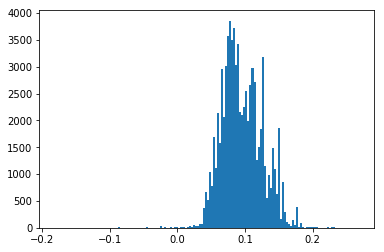

In [9]:
bins = np.arange(df.EstimatedReturn.min(), df.EstimatedReturn.max()+0.003, 0.003)
plt.hist(data = df, x= 'EstimatedReturn', bins = bins);

The data looks relatively normally distributed, but interestingly, there are many negative rates. Let's investigate these to see if they are legitimate or erroneous.

In [10]:
# Investigate negative values
negatives = df.query('EstimatedReturn < 0')
negatives

,ListingKey,Term,LoanOriginalAmount,LoanStatus,BorrowerRate,EstimatedReturn,ProsperScore,DebtToIncomeRatio,StatedMonthlyIncome,MonthlyLoanPayment,Investors,Reason
501,089C348555489823736377D,36,1000,Chargedoff,0.2100,-0.0013,5.0,0.32,2500.000000,37.68,31,Other
527,32543499181220496DBB555,36,1500,Completed,0.3269,-0.0677,1.0,0.31,5916.666667,65.91,27,Debt
760,4685347195009875809A70E,36,1500,Completed,0.2000,-0.0006,5.0,0.04,6250.000000,55.75,75,Debt
1349,0B5C34738042854656430E6,36,1800,Chargedoff,0.3500,-0.0251,1.0,0.44,3577.000000,81.42,24,Other
3686,421F3494976253733186DF9,36,7500,Chargedoff,0.3490,-0.0470,1.0,0.30,5491.666667,338.85,61,HomeImprovement
4310,9E5E3498204991686FFFDC9,36,7500,Completed,0.3100,-0.0836,1.0,0.46,10416.666667,322.51,75,HomeImprovement
4491,06C634936764915582779CD,36,7500,Chargedoff,0.3400,-0.0555,1.0,0.38,10650.500000,335.04,37,Debt
4530,0F393487035940130A9724B,36,6000,Completed,0.3089,-0.0636,1.0,0.06,6583.333333,257.64,169,HomeImprovement
5760,3AA83459022108282F14863,36,1750,Completed,0.3500,-0.0251,1.0,0.14,2468.416667,79.16,1,Debt
5882,951734715607690434676F3,36,2800,Completed,0.3400,-0.0345,1.0,0.31,1126.666667,98.85,68,Debt


The negative values don't appear to be erroneous, so I'll leave them in the data set, but will zoom in on more common values.

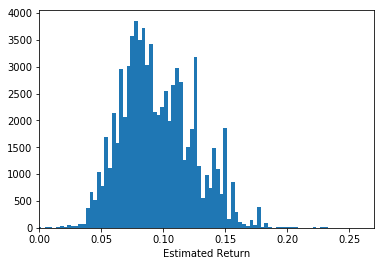

In [11]:
#run previous code while ignoring negative values
plt.hist(data = df, x= 'EstimatedReturn', bins = bins)
plt.xlim(0, 0.27);
plt.xlabel('Estimated Return');

It looks like most of the loans had an estimated return between 7-10%. There may be some slight skew to the right, but that could be the result of ignoring the negatives on this plot. Let's look at the outcomes of the loans.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

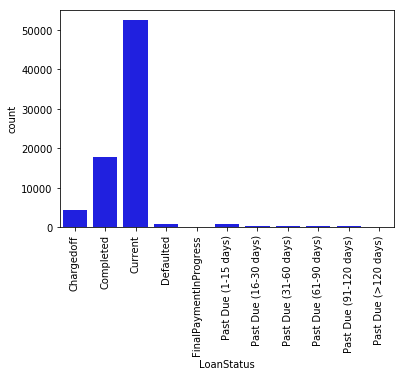

In [12]:
# explore loan status distribution
sb.countplot(data = df, x= 'LoanStatus', color = 'b');
plt.xticks(rotation= '90')

Looks like the overwhelimng majority of loans are current, with the next most common being completed and chargedoff. I may come back to this later and do a bit more wrangling to reframe the data into Successful loans and delinquent loans, but we'll see. Right now lets look at plots for terms, amounts, prosper scores, and number of investors

Text(0.5, 0, 'Term')

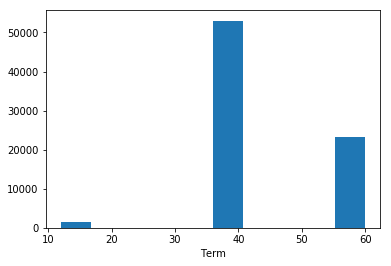

In [13]:
# plot ditributions of terms
plt.hist(data = df, x = 'Term')
plt.xlabel('Term')

These numeric values might as well be categorical, since there are only three types of terms.

In [14]:
df.LoanOriginalAmount.describe()

count    77557.000000
mean      9269.314208
std       6398.380615
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      14500.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

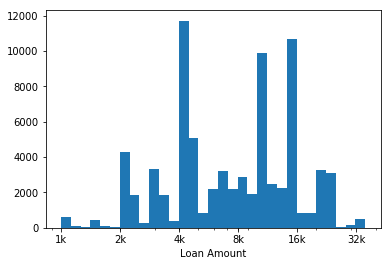

In [15]:
# plot ditributions of amounts
bins = 10 ** (np.arange(3.0, 4.6, 0.05))
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1000, 2000, 4000, 8000, 16000, 32000], [ '1k', '2k', '4k', '8k', '16k', '32k' ])
plt.xlabel('Loan Amount');

This plot was highly right skewed and needed to be log transformed. it seems like most loans were for about 5k, 10k , and 15k, with steep dropoffs between these amounts. It may be interesting to look how these round number loans faired vs. more specific amounts.

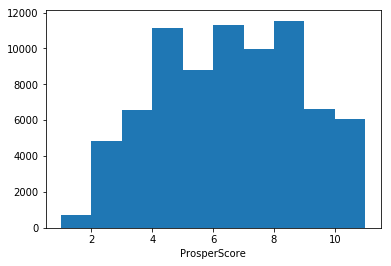

In [16]:
# plot ditributions of ProsperScores
var = df.ProsperScore
binsize = 1
bins = np.arange( var.min(), var.max()+binsize, binsize)
plt.hist(data = df, x = 'ProsperScore', bins = bins)
plt.xlabel('ProsperScore');

The scores appear normally distributed, perhaps a slight skew to the left

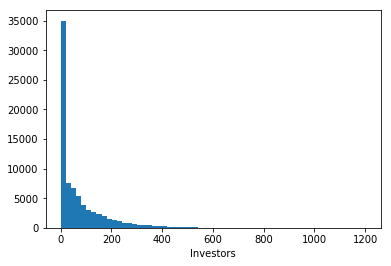

In [17]:
# plot ditributions of number of investors
var = df.Investors
binsize = 20
bins = np.arange( var.min(), var.max()+binsize, binsize)
plt.hist(data = df, x = 'Investors', bins = bins)
plt.xlabel('Investors');

This distribution is highly skewed. Let's do a log transform

In [18]:
np.log10(var.describe())

count    4.889621
mean     1.840278
std      1.988701
min      0.000000
25%      0.000000
50%      1.491362
75%      1.995635
max      3.075182
Name: Investors, dtype: float64

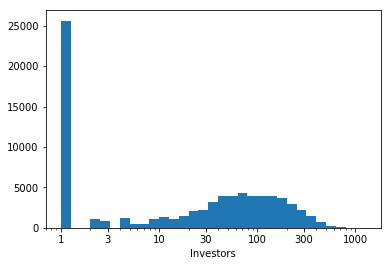

In [19]:
binsize = 0.1
bins = 10 ** (np.arange(np.log10(var.min()), np.log10(var.max())+binsize, binsize))
plt.hist(data = df, x = 'Investors', bins = bins)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 1000], [1, 3, 10, 30, 100, 300, 1000])
plt.xlabel('Investors');

Even after the log transform, the distribution is still highly skewed to the right, with about a third of all the loans funded by only one lender.  I wonder if people have the same theory as me that fewer investors means higher chance of repayment. This will be worth looking at later.  Finally, lets take a look at the reasons for requesting a loan.

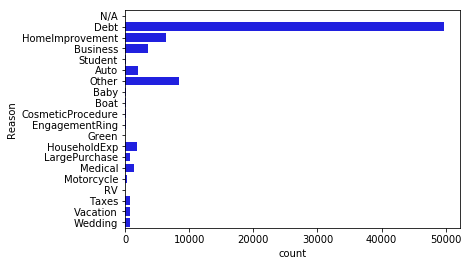

In [20]:
# explore Reason distribution
sb.countplot(data = df, y= 'Reason', color = 'b');

So It looks like two-thirds of the dataset took out loans for debt consolidation. It would be interested to see if there is any relation between the reason for the loan and how likely it was to be repaid.

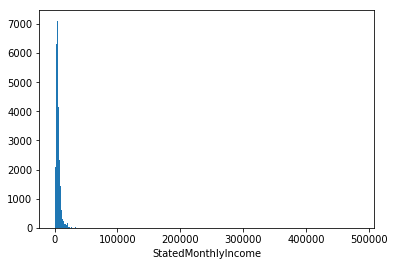

In [21]:
# plot ditributions of monthly Income
var = df.StatedMonthlyIncome
binsize = 500
bins = np.arange( var.min(), var.max()+binsize, binsize)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('StatedMonthlyIncome');

Looks like there may be some outliers here. Let's Investigate

In [22]:
df.query('StatedMonthlyIncome > 50000')

,ListingKey,Term,LoanOriginalAmount,LoanStatus,BorrowerRate,EstimatedReturn,ProsperScore,DebtToIncomeRatio,StatedMonthlyIncome,MonthlyLoanPayment,Investors,Reason
4691,29CD355548810550309CE80,36,13000,Completed,0.0974,0.06230,8.0,0.15,75000.000000,417.89,66,Debt
8066,37043512916744588463B5A,36,2000,Completed,0.3199,0.10870,4.0,0.00,416666.666667,87.10,10,Debt
11835,4871355292904293220ECB8,36,15000,Current,0.1089,0.06870,9.0,0.07,52500.000000,490.30,200,Debt
15035,F3FB3596383229729521E3D,36,35000,Current,0.1189,0.06706,10.0,0.09,66666.666667,1160.66,1,Debt
17411,873B351262140884511D81C,36,7500,Completed,0.3199,0.14870,5.0,0.00,483333.333333,326.62,128,Debt
20708,033E35605213283418555DB,36,15000,Completed,0.2099,0.10030,7.0,0.07,78364.416667,565.05,105,Other
21228,543F3595273244020AF64A4,36,4000,Current,0.2850,0.10256,2.0,0.10,53333.333333,166.54,3,HomeImprovement
21250,BCFA3525245392581961C3E,36,8797,Completed,0.1390,0.09050,10.0,0.09,53333.333333,300.24,184,Debt
27013,80613529108099469ADACD1,36,15000,Completed,0.1799,0.10740,8.0,0.15,75000.000000,542.21,21,Debt
29348,174E355896677953420118C,12,15000,Completed,0.1177,0.04950,10.0,0.07,73333.333333,1331.12,115,Other


These seem to be outliers, so since only 39 made over 50k per month, we will exclude these to prevent skewing.

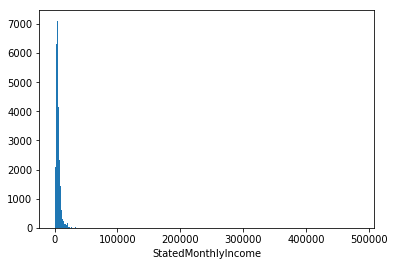

In [23]:
# Include only rows under 50,000 in monthly income
df = df.query('StatedMonthlyIncome < 50000')

# plot again
binsize = 500
bins = np.arange( var.min(), var.max()+binsize, binsize)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('StatedMonthlyIncome');

Still some outliers and skewness. Let's see it with some x limits and a transform

In [24]:
np.log10(var.describe())

count    4.889621
mean     3.775501
std      3.706047
min     -0.602060
25%      3.548185
50%      3.698970
75%      3.855317
max      5.684247
Name: StatedMonthlyIncome, dtype: float64

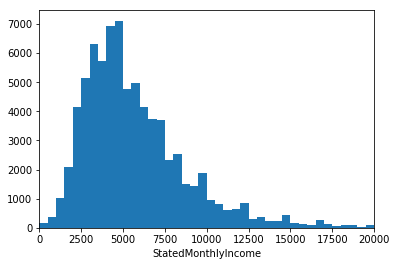

In [25]:
# plot again with xlim
binsize = 500
bins = np.arange( var.min(), var.max()+binsize, binsize)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins = bins)
plt.xlim(0, 20000)
plt.xlabel('StatedMonthlyIncome');

The log tranform didn't work because of the negative value of the log of the min.  But by adjusting the xlim, we are able to get an idea of the distribution, even if there is some skew. Income peaks between $4-5k per month. Let's take a cursory glance to see if there are any other variables that might be worth a deeper dive.

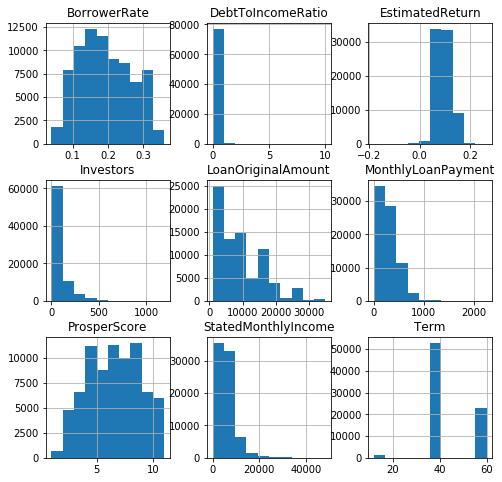

In [26]:
df.hist(figsize=(8,8));

Looks like Monthly Loan Payment and Debt to Income Ratio are highly skewed and might be workth a deeper dive.  Let's do some transforms on those.

In [27]:
# Check if a log transform is feasible.  
np.log10(df.DebtToIncomeRatio.describe())

C:\Users\pmalo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


count    4.889375
mean    -0.586932
std     -0.497052
min          -inf
25%     -0.823909
50%     -0.657577
75%     -0.494850
max      1.000434
Name: DebtToIncomeRatio, dtype: float64

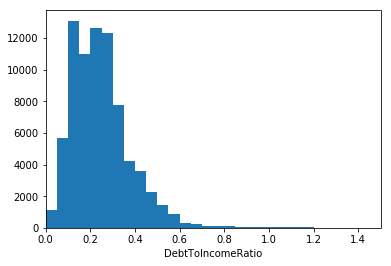

In [28]:
# plot ditributions of DebtToIncomeRatio
var = df.DebtToIncomeRatio
binsize = 0.05
bins = np.arange( var.min(), var.max()+binsize, binsize)
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = bins)
plt.xlim(0,1.5) # Data was highly skewwed due to an extreme outlier of 10.
plt.xlabel('DebtToIncomeRatio');

Upon viewing the ditribution, the data was highly skewed by an extreme outlier of 10, while almost all other values fell between 0 and 1.2.  The log tranform was not feasible, but limiting the range made it easier to view the distribution.  It looks most applicants have between a 0.05-0.25 debt-income ratio.

In [29]:
np.log10(df.MonthlyLoanPayment.describe())

C:\Users\pmalo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


count    4.889375
mean     2.470745
std      2.276786
min          -inf
25%      2.199892
50%      2.408901
75%      2.593552
max      3.352474
Name: MonthlyLoanPayment, dtype: float64

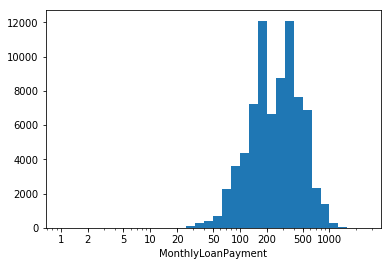

In [30]:
# plot ditributions of monthly payments
var = df.MonthlyLoanPayment
binsize = .1
bins = 10 ** np.arange( var.min(), np.log10(var.max())+binsize, binsize)
plt.hist(data = df, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000 ], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000 ])
plt.xlabel('MonthlyLoanPayment');

The min value in this column is 0, which seems odd, since a loan is required to be paid back. The plot shows that there don't appear to be many zeros, so let's investigate that a bit further.

In [31]:
# view all values where monthly payments are zero
no_monthly_payments = df.query('MonthlyLoanPayment == 0')
no_monthly_payments

,ListingKey,Term,LoanOriginalAmount,LoanStatus,BorrowerRate,EstimatedReturn,ProsperScore,DebtToIncomeRatio,StatedMonthlyIncome,MonthlyLoanPayment,Investors,Reason
27,0F5034867864161084F3789,36,4000,Completed,0.0920,0.0608,9.0,0.26,6666.666667,0.0,121,Debt
198,10BC3490850656956BA3148,36,3000,Completed,0.2575,0.1434,8.0,0.12,10000.000000,0.0,53,Other
710,376F3494682304277A1C7EC,36,15000,Completed,0.1365,0.0749,8.0,0.28,9083.333333,0.0,315,Business
1064,35983541133056379F4AA5F,12,2000,Completed,0.0608,0.0178,10.0,0.09,6250.000000,0.0,17,Business
1144,02913490596974830E7F037,36,1600,Completed,0.3200,0.1088,5.0,0.25,2083.333333,0.0,81,Other
2294,0C973481737689626C9D721,36,1200,Completed,0.3500,0.0799,3.0,0.29,3708.333333,0.0,20,Debt
2371,46583552598658623EF9DC4,12,2000,Completed,0.1224,0.0541,8.0,0.08,7083.333333,0.0,23,Auto
2447,6CAA34925543687971FC5B6,36,5000,Completed,0.3500,0.1369,4.0,0.46,3151.000000,0.0,81,Business
2475,27DC3499800845582383D0A,36,1300,Completed,0.1490,0.0772,8.0,0.07,916.666667,0.0,35,Other
2880,47CF3484070853138D482A9,36,1000,Completed,0.1300,0.0524,9.0,0.19,3150.000000,0.0,78,Debt


I tried looking at these zero values in full, and got back 443 results, which is more than I expected.  I noticed that most had a completed status, so I took a second look with an added filter to remove the completed loans.  There were still 19 returned, and while many are defaults, some also include FinalPaymentInProgress.  Since there are many other loans in the dataset that are no longer active, but still have values in the monthly payments column, it's not clear what these zero values are supposed to mean, and I find it hard to believe that free money was given out to people on the platform, and even if it was, it doesn't help in this analysis, so I will be dropping those rows from the dataset.

In [32]:
# remove rows with monthly payments of 0
df = df.query('MonthlyLoanPayment > 0')

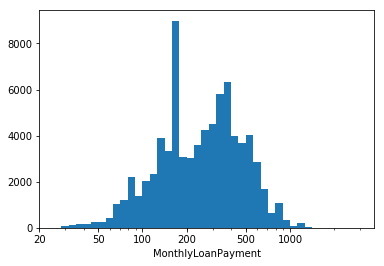

In [33]:
# plot again
binsize = .05
bins = 10 ** np.arange( var.min(), np.log10(var.max())+binsize, binsize)
plt.hist(data = df, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xlim(20)
plt.xticks([20, 50, 100, 200, 500, 1000 ], [20, 50, 100, 200, 500, 1000 ])
plt.xlabel('MonthlyLoanPayment');

The data for this column looks to be a bit bimodal with a huge spike in distribution around 150/month, and then again between 300-400.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

 Most variabels were roughly normally distributed, however, some were highly skewed, especially the Investors column. the overwhelming amount of loans were only funded by one person, which sort of surprised me. I would have guessed that people would feel more comfortable investing with a strength in numbers philosophy. I performed transformations on the Investors and Loan Amounts plots after seeing they were highly right skewed. The transform didn't make much difference for the Investors plot, tho it did allow me to see that the transformed data appeared more normally distributed if the single lenders were ignored. The transforms also allowed me to see that the Loan Amounts were roughly trimodal, peaking at intervals of 5000.  Monthly payments also required a log  tranform to be seen more clearly, and it turned out the data was bimodal, with a huge spike around 150 and another between 300-400.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

 I thought it was unusual that there were values for EstimatedReturns that were in the negatives.  However, upon further review, I found no evidence that these were erroneous, and decided not to remove them, especially since they apperaed to contribute to the normal distribution of the data. I did, however, remove loans with StatedMonthlyIncomes above 50k per month, as it was drastically skewing the data, and I find it hard to believe that someone with over 50,000 in monthly income would need a 10k Prosper loan with a 36 month term (and certainly not the people who reported over 400k in monthly income). I also removed all loans that had monthly payments of 0, because I am not interested in including charitable donations in the analysis.

## Bivariate Exploration

Now for the fun part: Let's see how these varibales affect each other

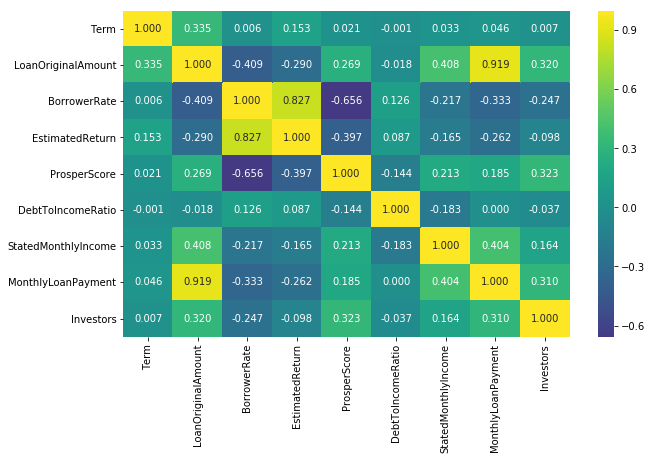

In [34]:
#Select numeric and categorical variables
num_vars = ['Term', 'LoanOriginalAmount', 'BorrowerRate', 'EstimatedReturn', 'ProsperScore', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Investors']
cat_vars = ['LoanStatus', 'Reason']

# heatmap for correlations of numeric variables
plt.figure(figsize = [10, 6])
sb.heatmap(df[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis', center = 0)
plt.show()

Unsurprisingly, the heatmap shows a strong positive correlation between loan amount and monthly payments. So people who take out more money have to pay more back, naturally. Also not surprising is that a higher borrower rate brought a high estimated return for lenders, and that as the ProsperScore declines, borrwer rate increases, so lower-rated applicants can expect higher interest rates.  Also, Term and DebtToIncomeRatio variables seem fairly neutral, so they may not be of much more interest.

More interestingly, borrower rates decreased as loan ammounts and monthly payments went up, which makes sense, since it's a smaller slice of a larger pie.  Also, as people's income increases, so does the amount of money they request to borrow.  What I found most intereting is the Investor column. Larger numbers of investors were need to fund larger loan ammounts, which makes sense, as it would be more risky to fund larger loan ammounts alone, so investors probably prefer to limit there exposure in those situations. Loans with higher ProsperScores had more investors involved, as was the case for higher loan ammounts and monthly payments. I was surpirsed that Investors was only slightly positively correlated with higher income, but especially since people higher incomes tend to take out larger loans and have higher monthly payments, but of which usually means more investors. I was also surprised that EstimatedReturn was has a slightly negative correlation with Investors, and borrower rates were lower, as one would think that investors would be more attracted to higher returns, but this is actually inline with the other factors, as larger loans have lower rates and thus lower returns in terms of percentage.

In [35]:
# Consolidate the LoanStatus values into two bins (Compliant and Delinquent) to make cahrting analysis simpler.
StatusBin = []
compliant = ['Completed', 'Current', 'FinalPaymentInProgress']
for index, row in df.iterrows():
    if row['LoanStatus'] in compliant:
        StatusBin.append("Compliant")
    else: StatusBin.append("Delinquent")
            
# Convert the list to new column in the df 
df['StatusBin'] = StatusBin
df['StatusBin'] = df['StatusBin'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77070 entries, 1 to 113936
Data columns (total 13 columns):
ListingKey             77070 non-null object
Term                   77070 non-null int64
LoanOriginalAmount     77070 non-null int64
LoanStatus             77070 non-null category
BorrowerRate           77070 non-null float64
EstimatedReturn        77070 non-null float64
ProsperScore           77070 non-null float64
DebtToIncomeRatio      77070 non-null float64
StatedMonthlyIncome    77070 non-null float64
MonthlyLoanPayment     77070 non-null float64
Investors              77070 non-null int64
Reason                 77070 non-null category
StatusBin              77070 non-null category
dtypes: category(3), float64(6), int64(3), object(1)
memory usage: 6.7+ MB


In [36]:
# Update cat_vars to include Status Bin instead of LoanStatus
cat_vars = ['StatusBin', 'Reason']

C:\Users\pmalo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1728x1728 with 0 Axes>

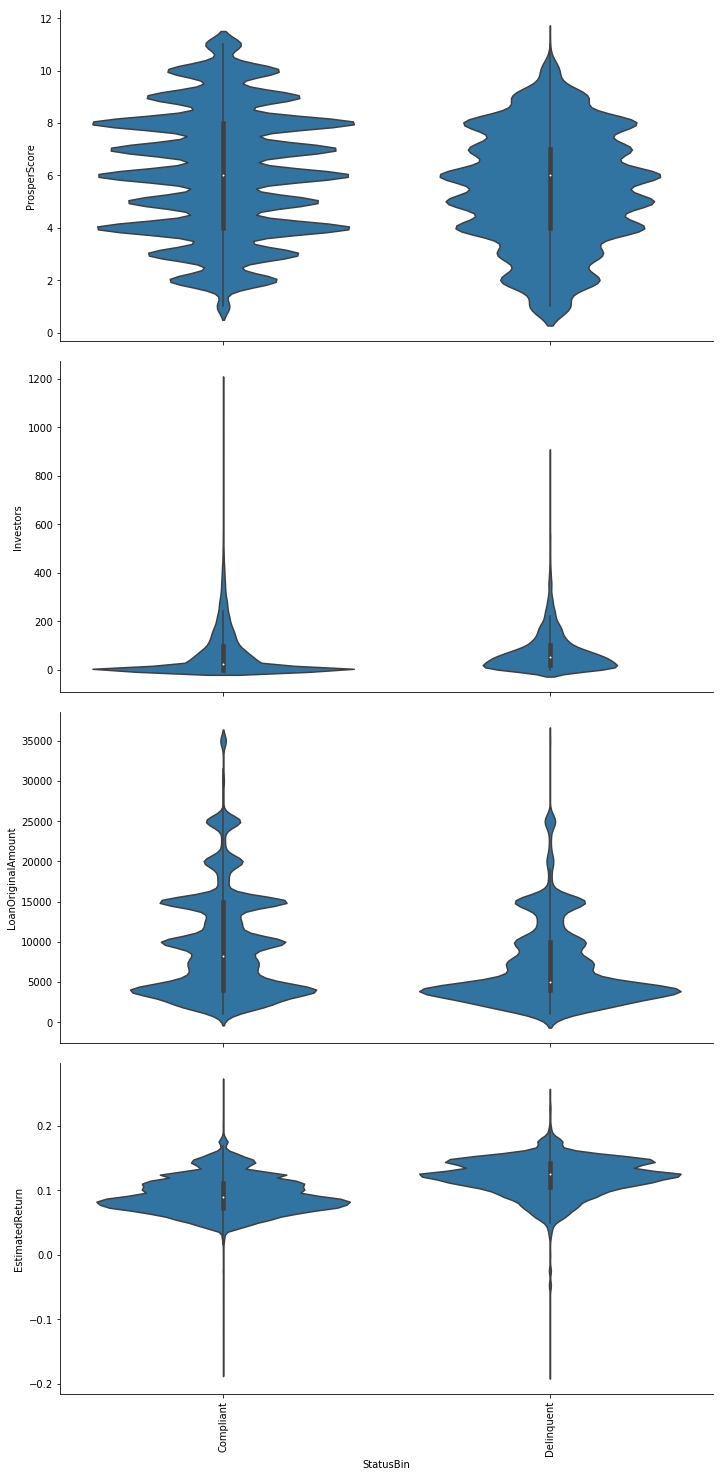

In [37]:
# Plot numerical varibles against StatusBin
def violingrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.violinplot(x, y, color = default_color)


plt.figure(figsize = [24, 24])
g = sb.PairGrid(data = df, y_vars = ['ProsperScore', 'Investors', 'LoanOriginalAmount', 'EstimatedReturn'], x_vars = 'StatusBin',
                height = 5, aspect = 2)
plt.xticks(rotation='90')
g.map(violingrid)
plt.show();

While examining Loan Status, I grouped the categories into two bins to simplify plotting.  While exploring the different relationships between the two groups, we see that compliant loans have a vertical symmetry to their distribution with 4 having the widest frequency, while delinquent loans seem to have more middling ratings, with 6 as the most frequent score.  Perhaps people who are given low ratings are more determined to prove Prosper wrong and outperform their score, whereas people with an average score may be less motivated to either "disprove" their low or validate their high ratings.  

It seems I may be right about fewer investors meaning a higher chance of compliance. The compliant loans had an enormous frequency of single loans, while the delinquents had a higher median and a broader distribution. 

Delinquent loans were disproportionately lower than compliant ones, and this could be a correlation of people with poor financial habits needing access to lower amounts of money and then not being able to pay it off.

Delinquent loans also had higher Estimated Returns, so investors should beware that the loans with the juciest rewards also have the higest risks of delinquency.

<Figure size 1728x1728 with 0 Axes>

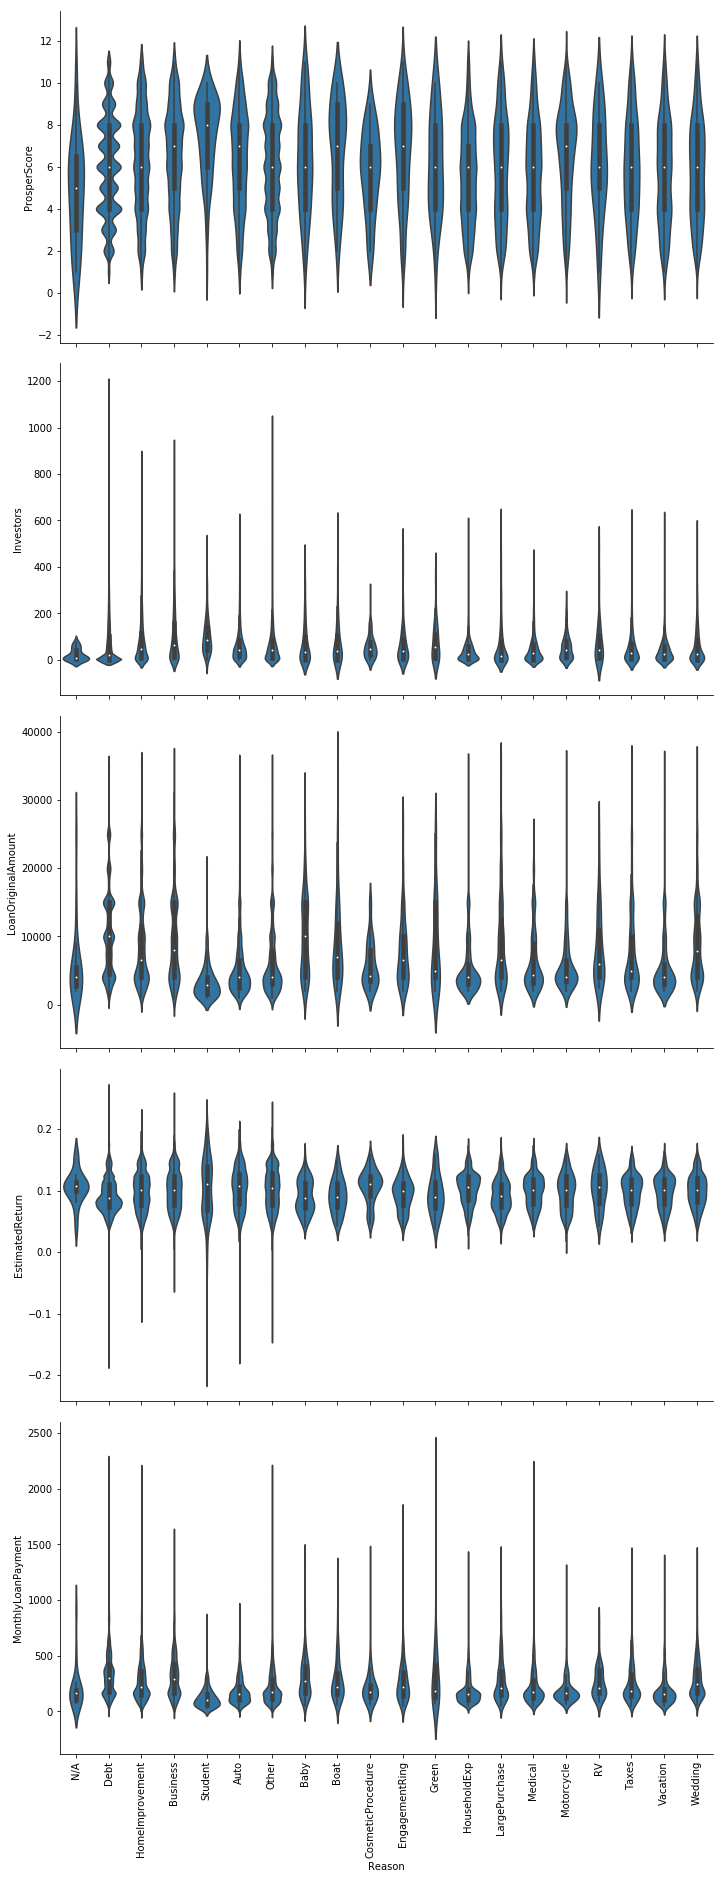

In [38]:
# Plot numeric variables against Reason
plt.figure(figsize = [24, 24])
g = sb.PairGrid(data = df, y_vars = ['ProsperScore', 'Investors', 'LoanOriginalAmount', 'EstimatedReturn', 'MonthlyLoanPayment'], x_vars = 'Reason',
                height = 5, aspect = 2)
plt.xticks(rotation='90')
g.map(violingrid)
plt.show();

There doesn't seem to be too many insights to be gained from the loan reasons against other numerical variables, though I did find it interesting that students have  the highest ProsperScores.  

Finally, Let's look at the relationship between Reason and StatusBin to see if any reasons are more relieable than others.

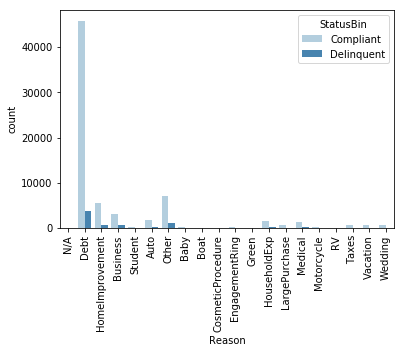

In [39]:
# produce a count plot that shows distribution for each StatusBin amongst each Reason
sb.countplot(data = df, x = 'Reason', hue = 'StatusBin', palette = 'Blues')
plt.xticks(rotation='90');

The sheer volume of the loans for debt consolidation make this plot a bit difficult to intertret, so let's zoom in on everything under 7200.

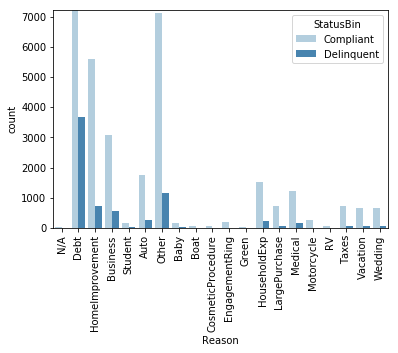

In [40]:
# Zoom in on values under 7200
sb.countplot(data = df, x = 'Reason', hue = 'StatusBin', palette = 'Blues')
plt.ylim(0, 7200)
plt.xticks(rotation='90');

From this plot, We get a little clearer picture. We can see that Business loans might be a little riskier than home improvement loans. Let's zoom in a bit more to see some of the smaller distributions.

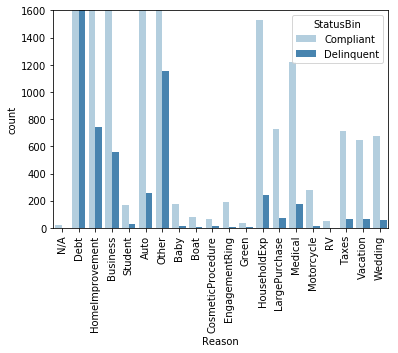

In [41]:
# Zoom in on values under 7200
sb.countplot(data = df, x = 'Reason', hue = 'StatusBin', palette = 'Blues')
plt.ylim(0, 1600)
plt.xticks(rotation='90');

Still pretty tough to see any clear trends.  Let's look at the percentages for each reason to see how things stand

In [42]:
# percentages of delinquency per Reason
df.groupby('Reason')['StatusBin'].value_counts(normalize=True)

Reason             StatusBin 
N/A                Compliant     0.947368
                   Delinquent    0.052632
Debt               Compliant     0.925754
                   Delinquent    0.074246
HomeImprovement    Compliant     0.882772
                   Delinquent    0.117228
Business           Compliant     0.845623
                   Delinquent    0.154377
Student            Compliant     0.852792
                   Delinquent    0.147208
Auto               Compliant     0.871743
                   Delinquent    0.128257
Other              Compliant     0.860305
                   Delinquent    0.139695
Baby               Compliant     0.910995
                   Delinquent    0.089005
Boat               Compliant     0.939024
                   Delinquent    0.060976
CosmeticProcedure  Compliant     0.850000
                   Delinquent    0.150000
EngagementRing     Compliant     0.955000
                   Delinquent    0.045000
Green              Compliant     0.800000
    

It seems like there may be a but more risk associated with business, green, and student loans, but for some the amounts are so much lower that it can't be assumed there is any statistical significance to the differences, apart from Business. Reason may not be too compelling of a factor

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

 It seems I may have been right about people being more likely to pay back loans with fewer investors, as the violin plots showed a bottom on the Compliant bin that was disproportionately wider than the Delinquent Bin.  Delinquent borrowers were also more likely to have borrowed less money. Lenders beware: Delinquent borrowers were much more likely to have higher Estimated returns than Loans that got paid back. Interstingly, compliant borrowers had a much higher distribution of ProsperScores of 3 or 4 than Delinquent borrowers, who had more with ProsperScores of 5 or 6.  There are likely other facotrs at play, but my hypothesis is that people may be grateful for the loan with the lower rating, or just be more motivated to prove their low score wrong, just as high rated borrowers may feel additional pressure to live up to their rating. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

 People who made more money asked to borrow more money. As the number of investors increased, so did the ProsperScore.

## Multivariate Exploration

Let's look at some multi-variate plots, specifically, how categorical variables play into some of the numeric relationships.

C:\Users\pmalo\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


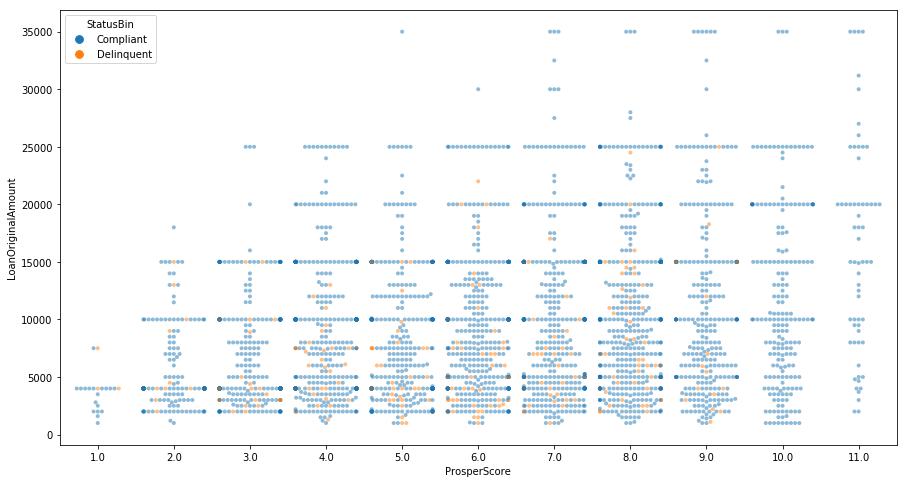

In [43]:
# Use sampling to help with load times and clarity
samples = np.random.choice(df.shape[0], 5000, replace = True)
df_samp = df.loc[samples,:]

# plot ProsperScore vs. Investors, and how this affects StatusBin
plt.figure(figsize= (15,8))
sb.swarmplot(data= df_samp, y= 'LoanOriginalAmount', x = 'ProsperScore', hue='StatusBin', alpha=.5, size= 4);

In this plot, there seems to be a lot of density near the middle of the ProsperScore scale and low on the loan amount scale.  This is also where we see the most amount of orange. As i stated earlier, there seems to be a higher concentration of orange in the middle scores than on the lower, with the exception of the 1s, of course.  There are very low delinquency rates as the loans and prosper scores get higher, and there is substantially more borrowing done at the intervals of 5k, and at round numbers in general and 1k intervals as the amounts decrease.

In [44]:
df.Reason.value_counts()

Debt                 49511
Other                 8268
HomeImprovement       6321
Business              3621
Auto                  1996
HouseholdExp          1775
Medical               1396
LargePurchase          804
Taxes                  779
Wedding                730
Vacation               716
Motorcycle             289
EngagementRing         200
Student                197
Baby                   191
Boat                    82
CosmeticProcedure       80
RV                      50
Green                   45
N/A                     19
Name: Reason, dtype: int64

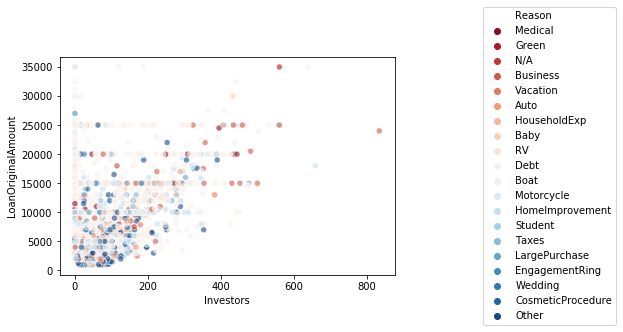

In [45]:
# Place debt in the middle to best see the other Reasons
reason_order = ['Medical', 'Green', 'N/A', 'Business', 'Vacation', 'Auto', 'HouseholdExp', 'Baby', 'RV', 'Debt', 'Boat', 'Motorcycle','HomeImprovement', 'Student', 'Taxes', 'LargePurchase', 'EngagementRing', 'Wedding', 'CosmeticProcedure', 'Other']
# Reason vs loanAmount vs Investors
g = sb.scatterplot(data = df_samp, x= 'Investors', y= 'LoanOriginalAmount', hue= 'Reason', hue_order= reason_order, palette="RdBu", alpha=0.6)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

Interestingly, even the highest loan amounts were still more concentrated under a single investor, though other than than there is a positive correlation.  This confirms that Reason does not appear to play much of a role in whether or not investors chose to fund a loan or not, as the colors are fairly well spread out.

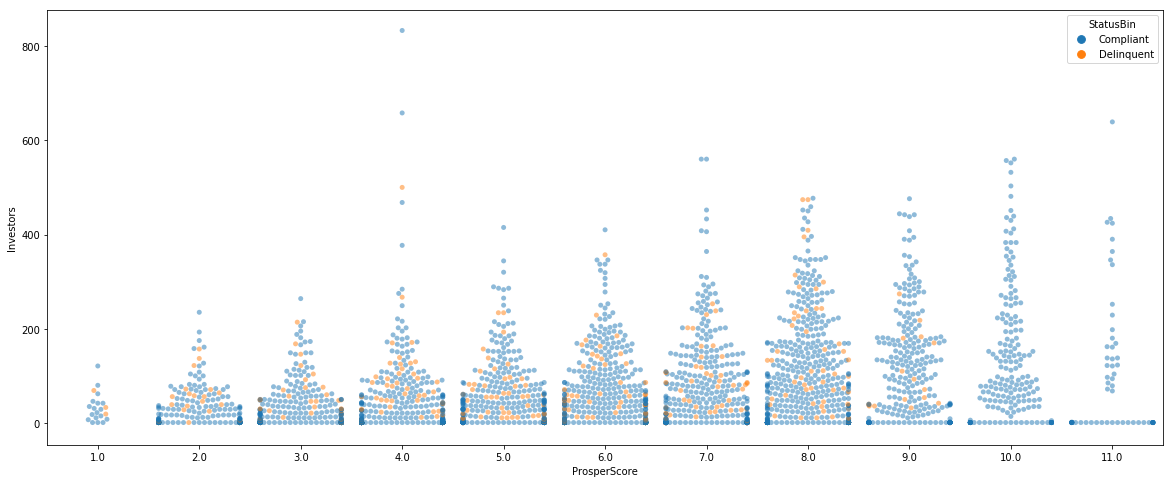

In [46]:
# plot investors by ProsperScore and StatusBin
plt.figure(figsize= (20,8))
sb.swarmplot(data= df_samp, y= 'Investors', x = 'ProsperScore', hue='StatusBin', alpha=.5, size= 5);

Investors increases as ProsperScore increases, and there is far more orange in the middle, and almost none on the bottom row, which represent single investors.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

 Investors, outside of loans with a single invester, rose as the loan amount rose. The Reason did not appear to affect either category, so it seems that Investors aren't so worried with what is done with the money. Small loans with middling scores where the most common and also the most likely to be delinquent.

### Were there any interesting or surprising interactions between features?

 I'm a little surprised how little of an effect Reason had. If it were me I think that is something I would look at closely before lending, but the data doesn't really show it affecting other factors.  I also find it interesting that middling scores have a higher concentration of delinquencies than lower scores. I think I might be on to something with my theory on the matter.